### Project Description:
For this project I have downloaded a sample dataset of tweets determined to be made by Russian troll accounts. The data was published by FiveThirtyEight and can be found here [3 million Russian troll tweets](https://github.com/fivethirtyeight/russian-troll-tweets)

In order to create a sentiment analysis of the tweets present in the csv, we must first import them and get rid of any non-english content.

In [167]:
import pandas as pd
from textblob import TextBlob
import re

# Read the content of the tweets from the csv
df = pd.read_csv('IRAhandle_tweets_1.csv',usecols=['content','language'])

# Remove non-english content from the dataframe
df.drop(df.index[df['language']!='English'],inplace=True)
df.drop(columns=['language'],inplace=True)
df.reset_index(drop=True,inplace=True)
df.head(5)

,content
0,"""We have a sitting Democrat US Senator on tria..."
1,Marshawn Lynch arrives to game in anti-Trump s...
2,Daughter of fallen Navy Sailor delivers powerf...
3,JUST IN: President Trump dedicates Presidents ...
4,"19,000 RESPECTING our National Anthem! #StandF..."


We will then attempt to read the data and generate a sentiment analysis.

In [166]:
amount = len(df['content'])

df['content'].str.replace(r'(@\w+)|(https?:\/\/.+)|(# ?\w+)','',regex=True)

df['polarity'] = df['content'].apply(lambda tweet: TextBlob(tweet).polarity)

positive = len(df[df['polarity']>0])
neutral = len(df[df['polarity']==0])
negative = len(df[df['polarity']<0])

print(f'Of {amount} tweets:')
print('Positive tweets: {} - {:.2f}%'.format(positive,(positive/amount)*100))
print('Neutral tweets: {} - {:.2f}%'.format(neutral,(neutral/amount)*100))
print('Negative tweets: {} - {:.2f}%'.format(negative,(negative/amount)*100))

Of 190252 tweets:
Positive tweets: 56311 - 29.60%
Neutral tweets: 94335 - 49.58%
Negative tweets: 39606 - 20.82%


Now we can calculate popular keywords in the dataset using spacy. Only the first 10000 tweets will be used to conserve memory.

In [168]:
import spacy
nlp = spacy.load("en_core_web_sm")
keywords = nlp(' '.join(df['content'].head(10000)))
print('Top keywords: ',keywords.ents[:10])

Top keywords:  (Democrat, US, Marshawn Lynch, Lynch, Navy, NFL, BoycottNFL, Trump, Florida, Texas)


Visualizing our data outputs with matplotlib:

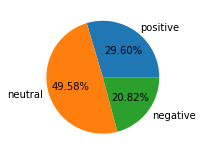

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
labels = 'positive','neutral','negative'
fig,ax = plt.subplots()
ax.pie([positive,neutral,negative], labels=labels, autopct='%1.2f%%')
plt.show()

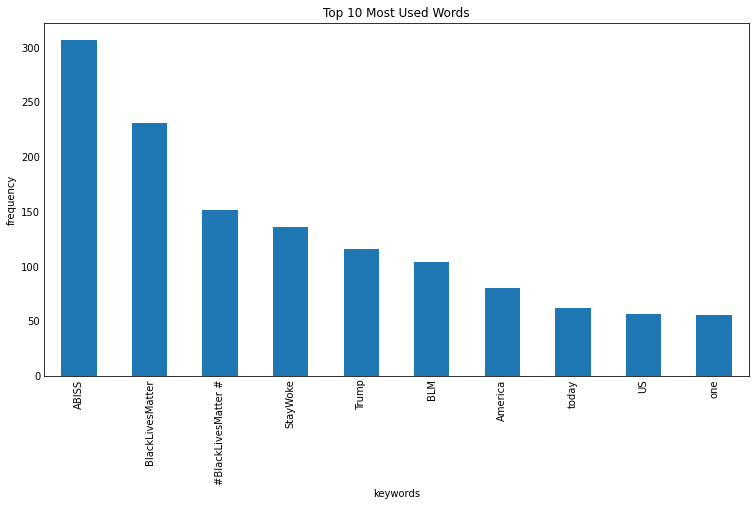

In [173]:
plt.figure(figsize=(10,5))
plt.title('Top 10 Most Used Words')
words = [x for x in map(str,keywords.ents) if len(x)>1]
df = pd.DataFrame(words,columns=['keywords'])
df['keywords'].value_counts()[:10].plot(kind='bar',xlabel='keywords',ylabel='frequency')


plt.show()
